## 15.12 Common pitfalls

### 15.12.1 Perfect separation

Perfect separation happens when the outcome can be directly predicted from one of the predictor variables. For example, let say that we model an outcome $Y$ using one explanatory standard gaussian variable $X_1$ and that $Y$ is such that $Y=0$ whenever $X_1\leq0$ and $Y=1$ whenever $X_1>0$.

In [1]:
x1 <- rnorm(1000, 0, 1)
y <- (x1 <= 0)*1

data_sep <- data.frame(y,x1)

Let us try to estimate this logistic regression model

In [2]:
model_sep <- glm(y ~ x1, data = data_sep, family = binomial(link="logit"))

Warning message:
"glm.fit: algorithm did not converge"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

`R` detects the perfect separation and prompts an error that states that `fitted probabilities numerically 0 or 1 occurred`. The reason of this error is that, due to the perfect separation, the maximum likelihood of the parameter $\beta_1$ for the variable $X_1$ cannot be estimated as its value is actually infinite. Options to consider when facing this issue include:

* removing the problematic variable from the model
* setting $\beta_1$ at an arbitrary high value and estimate the model
* changing the model or manipulating the data

Note that, in practice, perfect separation is not very likely to happen. However, *quasi_perfect* separation is totally possible and needs to be tackled. For more details about how to handle separation, one can read the following articles:

> *Heinze, G., & Schemper, M. (2002). A solution to the problem of separation in logistic regression. Statistics in Medicine* 
>   
> *Firth, D. (1993). Bias Reduction of Maximum Likelihood Estimates. Biometrika*


### 15.12.2 Low events per variable

A common issue when estimating logistic regression model is the problem of the ratio between the number of events and the number of predictive variables. This ratio is known as *Events Per Variable*. When this ratio is low, it can lead to biased estimation and models with poor predictive abilities.

In the biomedical literature, the so-called *ten events per variable rule* is commonly used. However, we emphasize here the absence of theoretical justification and even the lack of actual evidence that this rule gives good results. If you want more information about the issues raised by this commonly used rule, you can read the following article:

> *Smeden, M., de Groot, J.A., Moons, K.G. et al. (2016) No rationale for 1 variable per 10 events criterion for binary logistic regression analysis. BMC Med Res Methodol*.


### 15.12.3 Influential values

Another aspect to take into account when estimating a logistic regression model is the presence of influential values among the observations which, as their names indicates, might have a huge impact on the estimation of the model. The Cook's distance is a useful measure to assess how influential an observation is. It measures how much the outcome would be modifier by removing this observation from the data.

In, `R`, the Cook's distance can be easily plotted and directly plotted by specifying `which = 4` as an argument to the `plot` function.


Call:
glm(formula = dementia ~ sex + age + bmi, family = binomial(link = "logit"), 
    data = dementia)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1067  -0.1959  -0.1134  -0.0732   3.6917  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.783837   0.152138 -64.309  < 2e-16 ***
sex          0.306798   0.033773   9.084  < 2e-16 ***
age          0.098682   0.001413  69.826  < 2e-16 ***
bmi         -0.025619   0.003596  -7.124 1.05e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38333  on 199999  degrees of freedom
Residual deviance: 31732  on 199996  degrees of freedom
AIC: 31740

Number of Fisher Scoring iterations: 8


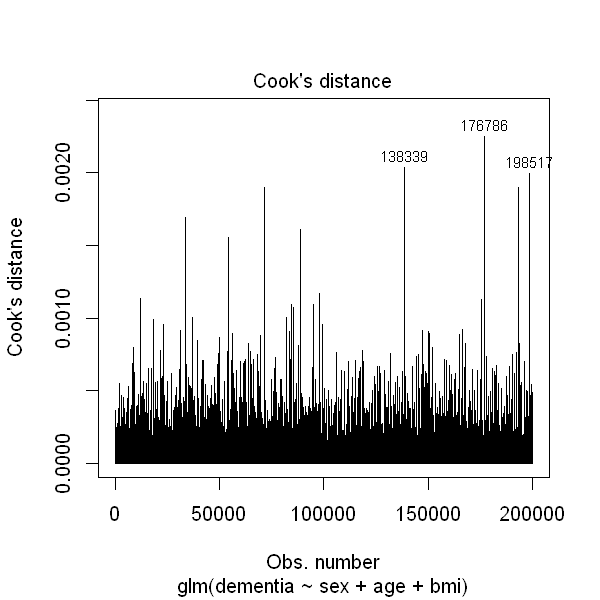

In [3]:
dementia <- read.csv("Practicals/Datasets/Dementia/dementia2.csv")
dementia2 <- glm(dementia ~ sex + age + bmi, data = dementia, family = binomial(link="logit"))
summary(dementia2)
options(repr.plot.height=5, repr.plot.width=5)
plot(dementia2, which = 4)

As you can see from the above example, some observations seems to have higher influence than the other. However, if we look at the y-axis scale, this difference is not huge.

If some observations appear to have a lot of influence on the estimated regression coefficients, it is important to assess the robustness of your conclusions to these observations. This is typically done using *sensitivity analysis*, i.e. performing the analysis including and excluding the problematic observations.

Note that we would not recommend excluding observations from an analysis entirely just because they are influential or outlying. 
